In [1]:
import sympy as smp
import numpy as np
import plotly.graph_objects as go
import pandas as pd
from symfit import parameters, variables, sin, cos, Fit

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure

In [2]:
N = 40
spacing = 0.5

size = np.linspace(-N, N, int(N/spacing))            
X, Y, Z = np.meshgrid(size, size, np.linspace(-N, N, int(2*N/spacing)))

R = 10
r = 5
a = 10

H = (X - R*np.cos(Z/a))**2 + (Y - R*np.sin(Z/a))**2

In [3]:
# define a boolean mesh with points > 20% difference from r squared.
surface_cond = np.where(abs(H - r**2) >= 0.2*(r**2))

# delete points using surface_cond mesh.
X = np.delete(X, surface_cond, axis=2)
Y = np.delete(Y, surface_cond, axis=2)
Z = np.delete(Z, surface_cond, axis=2)

for k in range(len(space)):
    space[k] = np.delete(space[k], surface_cond)

NameError: name 'space' is not defined

In [4]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=space[0],
    y=space[1],
    z=space[2],
    text=space[3],
    mode='markers',
    marker=dict(
        size=2,
        color=space[3],
        colorscale='Viridis'
    )))

NameError: name 'space' is not defined

In [5]:
space_mc = space[0:3]
space_mc = np.stack(space_mc)

space_mc

NameError: name 'space' is not defined

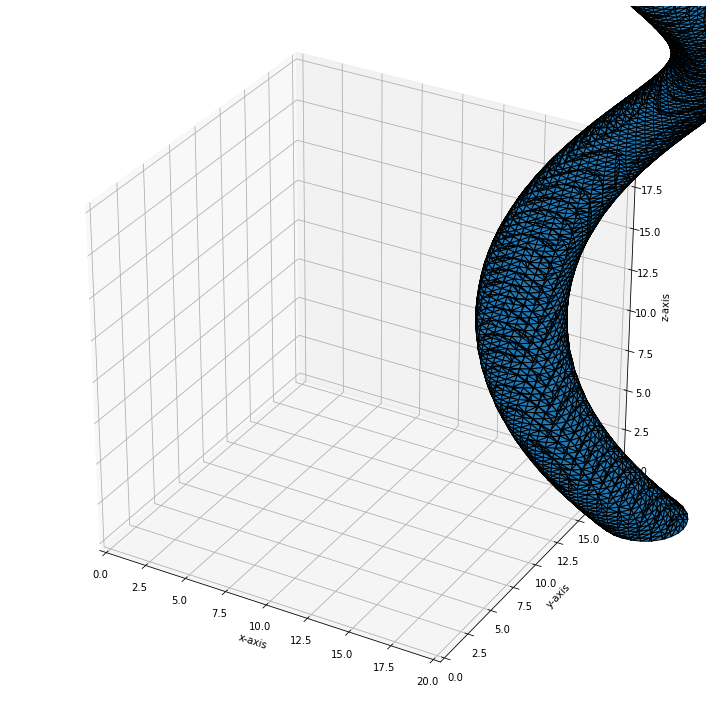

In [6]:
# Use marching cubes to obtain the surface mesh of spiral
verts, faces, normals, values = measure.marching_cubes_lewiner(H,
                                                               level=r**2,
                                                               spacing=(spacing,
                                                                        spacing,
                                                                        spacing/2))

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

ax.set_xlim(0, 20)  
ax.set_ylim(0, 20)  
ax.set_zlim(0, 20)  


plt.tight_layout()
plt.show()